In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv("crimes_against_women_2001-2014.csv")
df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [40]:
df["STATE/UT"]=df.apply(lambda row:row['STATE/UT'].replace(" ","").lower(),axis=1)
df['STATE/UT'].replace("delhiut",'delhi',inplace=True)

In [41]:
df.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [42]:
df=df.drop(['Unnamed: 0'],axis=1)

In [43]:
df['total_crimes']=(df['Rape']+df['Kidnapping and Abduction']+df['Dowry Deaths']+
                       df['Assault on women with intent to outrage her modesty']+
                       df['Insult to modesty of Women']+df['Cruelty by Husband or his Relatives']+
                       df['Importation of Girls'])

In [44]:
df['total_crimes']

0        454
1        356
2        456
3        278
4        475
        ... 
10672      4
10673      4
10674     18
10675     44
10676     62
Name: total_crimes, Length: 10677, dtype: int64

In [45]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=10)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y+2,y,ha='center',fontweight='bold',fontsize=7)


In [46]:
value_count=list(df["STATE/UT"].value_counts())
print("***** Value counts of STATES/UT *****")
print()
print(value_count)

***** Value counts of STATES/UT *****

[1032, 739, 645, 632, 552, 541, 504, 472, 461, 425, 424, 384, 372, 370, 366, 324, 318, 276, 234, 222, 208, 196, 162, 147, 129, 120, 87, 71, 44, 43, 42, 37, 28, 28, 28, 14]


In [47]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df1=pd.DataFrame()
for i in crimes:
    df_crimes=df.groupby(['Year'])[i].sum()
    df1[i]=df_crimes

print("***** Total number of crimes from 2001 to 2014 *****")
print()
df1

***** Total number of crimes from 2001 to 2014 *****



,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046
2006,38696,34828,15236,73234,19932,126256,134,308316
2007,41474,40832,16186,77468,21900,151860,122,349842
2008,42934,45878,16344,80826,24428,162688,134,373232
2009,42794,51482,16766,77422,22018,179092,96,389670


# ANALYSIS OF CRIMES - YEARWISE 

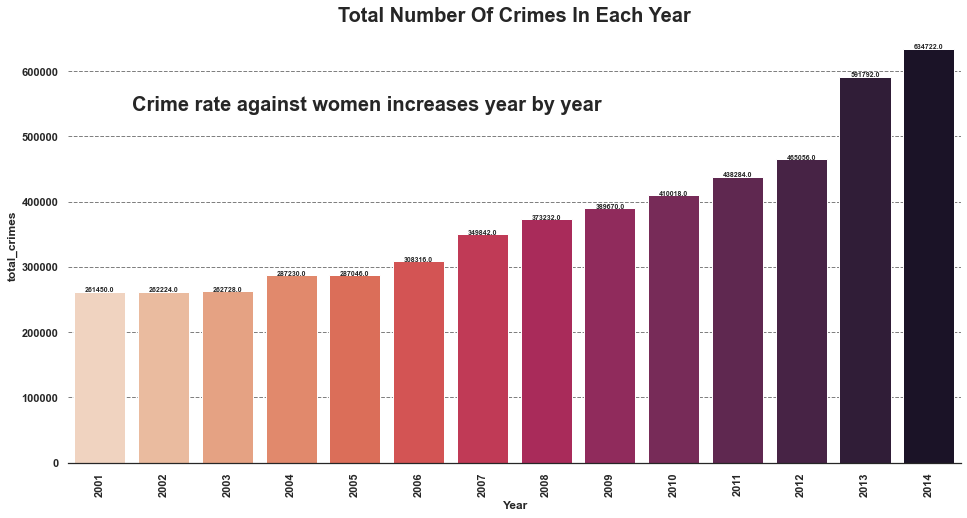

In [48]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014
arr=[]
for i in range(lower_year,upper_year+1):
    arr.append(i)
arr=np.array(arr)
a=sns.barplot(data=df1,x=arr,y='total_crimes',palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each Year",fontweight='bold',fontsize=20)
without_hue(df1,'total_crimes',a)
plt.show()

In [49]:
def plotting_cat_features(nrows,ncols,cat_columns):
    
    f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(16,25))
#     f.patch.set_facecolor('#F2EDD7FF')
    #Setting background and foreground color
#     for i in range(0,nrows):
#         for j in range(0,ncols):
#             ax[i][j].set_facecolor('#F2EDD7FF')

#     #Plotting count plot 
    for i in range(0,nrows):
        for j in range(0,ncols):
            a1=sns.barplot(data=df1,x=df1.index,y=cat_columns[i*(nrows-2)+j],palette='rocket',ax=ax[i][j])
            without_hue(df,cat_columns[i-1],a1)
            #Dealing with spines
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['left'].set_visible(False)
            ax[i][j].grid(linestyle="--",axis='y',color='gray')
            

********** How each crime varying year by year **********



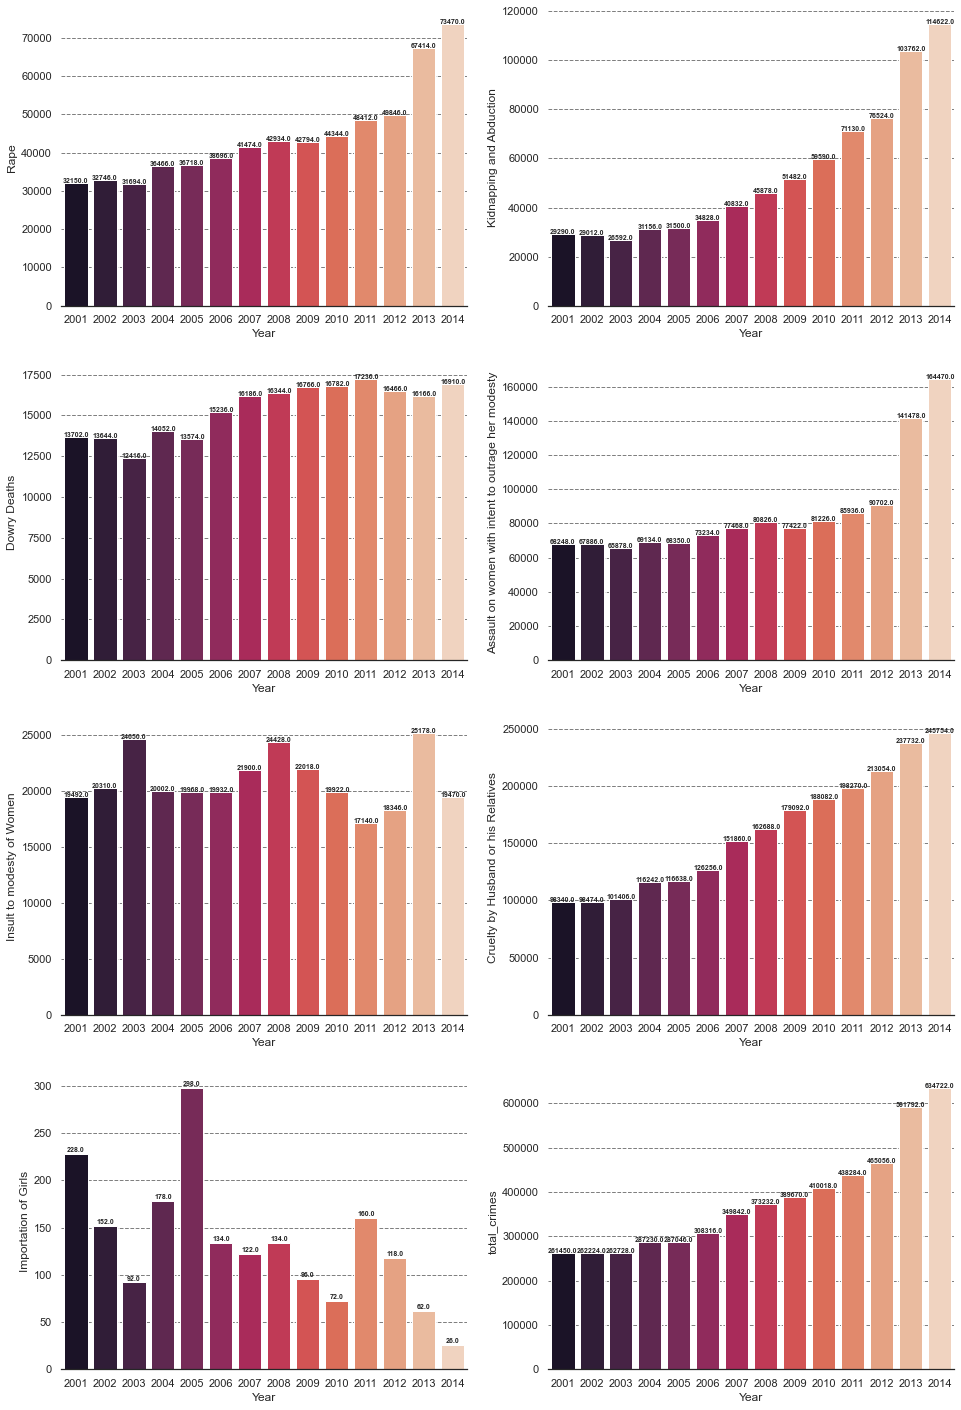

In [50]:
print("********** How each crime varying year by year **********")
print()
plotting_cat_features(4,2,crimes)


C:\Users\vijit\AppData\Local\Temp/ipykernel_13108/2717805039.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


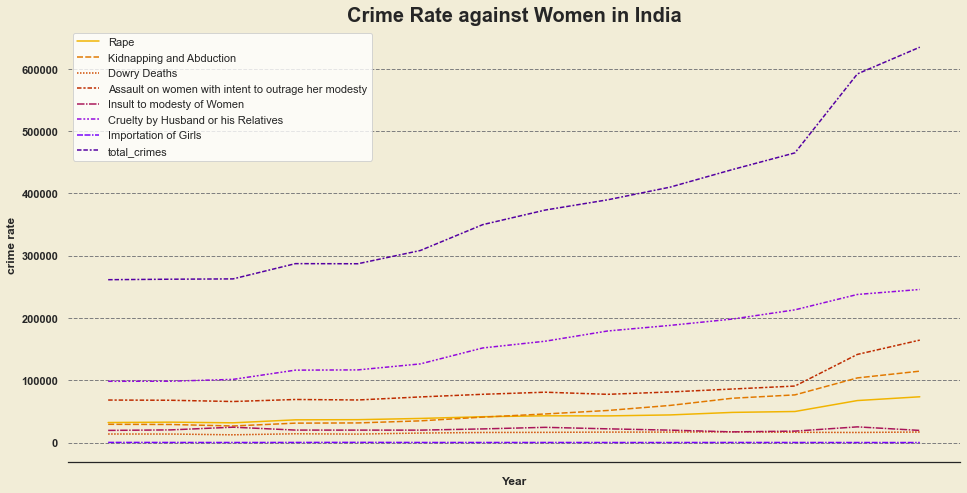

In [51]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

lower_year=2001
upper_year=2014
arr=[]
for i in range(lower_year,upper_year+1):
    arr.append(i)
arr=np.array(arr)

a=sns.lineplot(data=df1,palette='gnuplot_r',linestyle="dashed")#,x=arr,y='Rape',hue_order=crimes,palette='rocket_r')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("crime rate",fontweight='bold')
plt.title("Crime Rate against Women in India",fontweight='bold',fontsize=20)
plt.show()

C:\Users\vijit\AppData\Local\Temp/ipykernel_13108/3295354684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)
C:\Users\vijit\AppData\Local\Temp/ipykernel_13108/3295354684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)
C:\Users\vijit\AppData\Local\Temp/ipykernel_13108/3295354684.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)
C:\Users\vijit\AppData\Local\Temp/ipykernel_13108/3295354684.py:8: FutureWarning: The frame.append method is dep

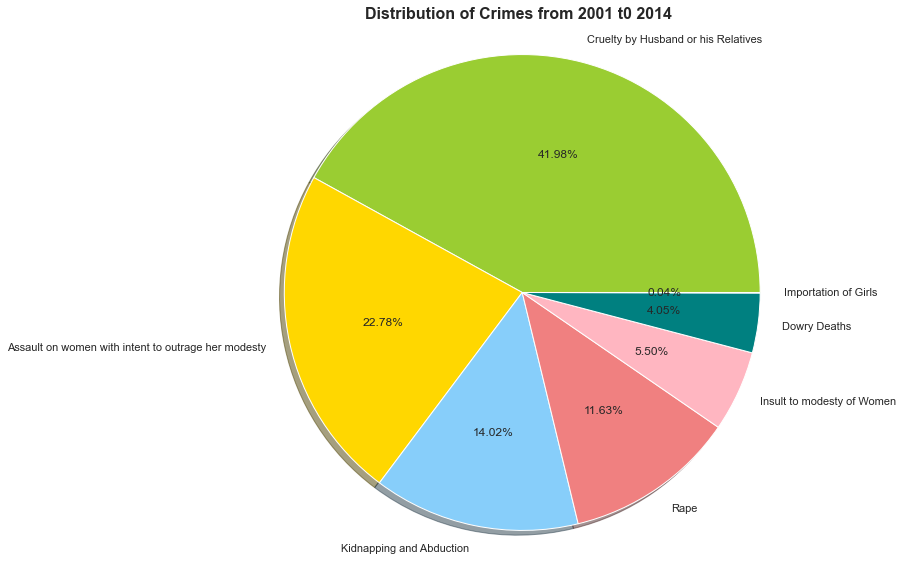

In [52]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls']

df_top_crimes=pd.DataFrame(columns=['crimes',"total"])
for i in crimes:
    df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)
    
df_top_crimes=df_top_crimes.sort_values(by='total',ascending=False)

df_top_crimes

list_crimes_number=list(df_top_crimes['total'])
list_crimes=list(df_top_crimes['crimes'])
fig=plt.figure(figsize=(12,8))

ax=plt.axes()
colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','lightpink','teal','green']
#patches,text=plt.pie(list_crimes_number,colors=colors,labels=list_crimes_number,autopct='%1.1f%%')
plt.pie(list_crimes_number,colors=colors,labels=list_crimes,autopct='%1.2f%%',shadow=True)
#plt.legend()
plt.title("Distribution of Crimes from 2001 t0 2014",fontweight='bold',fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

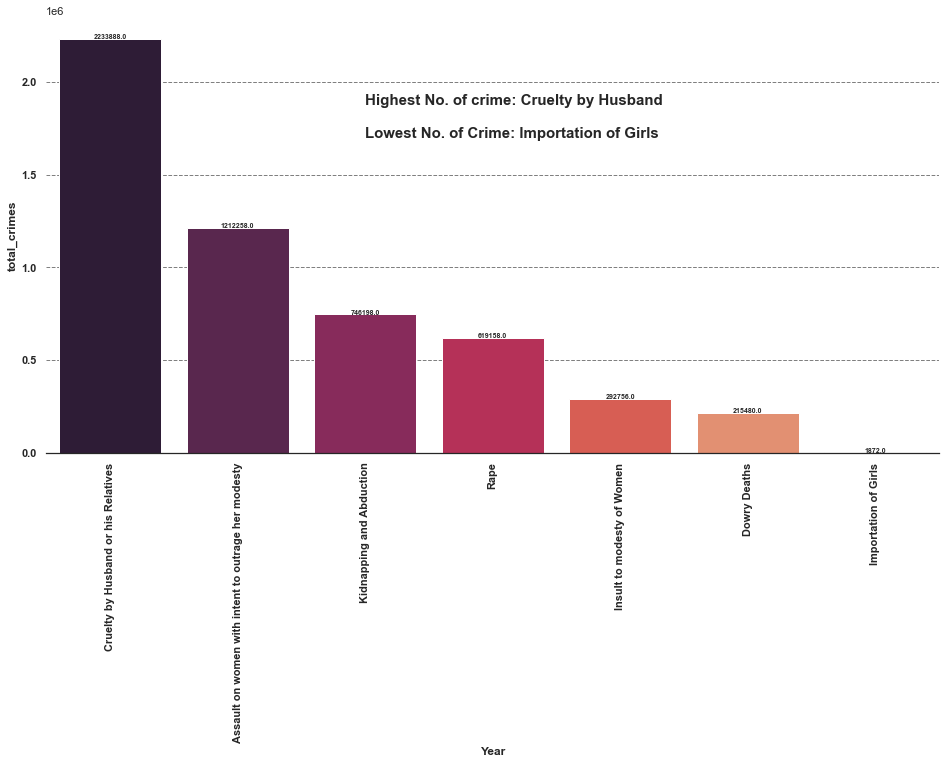

In [53]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(16,8))

ax=plt.axes()

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_top_crimes,y='total',x='crimes',palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90)
#plt.text(0.5,540000,"Crime rate against women increases year by year",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.text(2,1700000, "Highest No. of crime: Cruelty by Husband\n\nLowest No. of Crime: Importation of Girls",fontweight='bold',fontsize=15)
without_hue(df_top_crimes,'total',a)
plt.show()

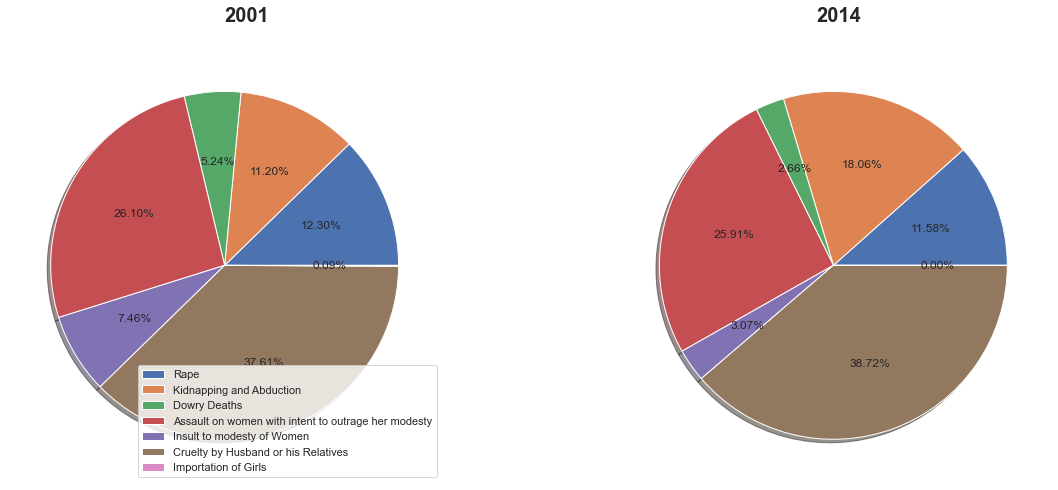

In [54]:
df_2001=df1.loc[df1.index==2001]
df_2014=df1.loc[df1.index==2014]

df_2001=df_2001.drop(["total_crimes"],axis=1)
df_2014=df_2014.drop(["total_crimes"],axis=1)
crimes_in_2001=list(df_2001.iloc[0])
crimes_in_2014=list(df_2014.iloc[0])

f,ax=plt.subplots(1,2,figsize=(20,8))

#Setting background and foreground color
for j in range(0,2):
    ax[j].set_facecolor('#F2EDD7FF')
    
ax[0].pie(crimes_in_2001,autopct='%1.2f%%',shadow=True)
ax[0].text(0,1.4,"2001",fontweight='bold',fontsize=20)
ax[1].pie(crimes_in_2014,autopct='%1.2f%%',shadow=True)
ax[0].text(3.4,1.4,"2014",fontweight='bold',fontsize=20)
ax[0].legend(labels=df_2001.columns,loc='lower right')

plt.show()

In [55]:
print("***** Total number of Unique States/Union Territories we have in Data *****")
print()
states=df['STATE/UT'].unique()
print("Number of states/territories without duplicates: ", len(states))
print()
print(states)

***** Total number of Unique States/Union Territories we have in Data *****

Number of states/territories without duplicates:  36

['andhrapradesh' 'arunachalpradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachalpradesh' 'jammu&kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhyapradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamilnadu'
 'tripura' 'uttarpradesh' 'uttarakhand' 'westbengal' 'a&nislands'
 'chandigarh' 'd&nhaveli' 'daman&diu' 'delhi' 'lakshadweep' 'puducherry'
 'telangana']


In [56]:
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df_state=pd.DataFrame()
for i in crimes:
    df_state_crimes=df.groupby(['STATE/UT'])[i].sum()
    df_state[i]=df_state_crimes

print("***** Each cateogry of crimes in each state from 2001 to 2014 *****")
print()
df_state=df_state.sort_values(by='total_crimes',ascending=False)
df_state.reset_index()

***** Each cateogry of crimes in each state from 2001 to 2014 *****



,STATE/UT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
0,uttarpradesh,51150,135906,57256,91212,53130,193738,6,582398
1,andhrapradesh,32150,34504,13844,126952,86964,280906,34,575354
2,westbengal,47876,61158,12308,66908,5348,344124,254,537976
3,rajasthan,45684,66278,11854,83362,794,262200,14,470186
4,madhyapradesh,90996,35608,21090,195478,20964,102816,134,467086
5,maharashtra,48974,30368,9696,114704,32634,193202,6,429584
6,assam,40190,62074,3268,38256,254,115300,22,259364
7,kerala,20030,4452,700,80438,7930,111626,0,225176
8,gujarat,11644,34670,1108,23186,3230,146468,0,220306
9,bihar,30758,57086,32206,16958,694,69770,904,208376


In [57]:
def without_hue_state(data,feature,ax):
    
    total=data['total_crimes'].sum()
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,percentage,ha='center',fontweight='bold',fontsize=10)


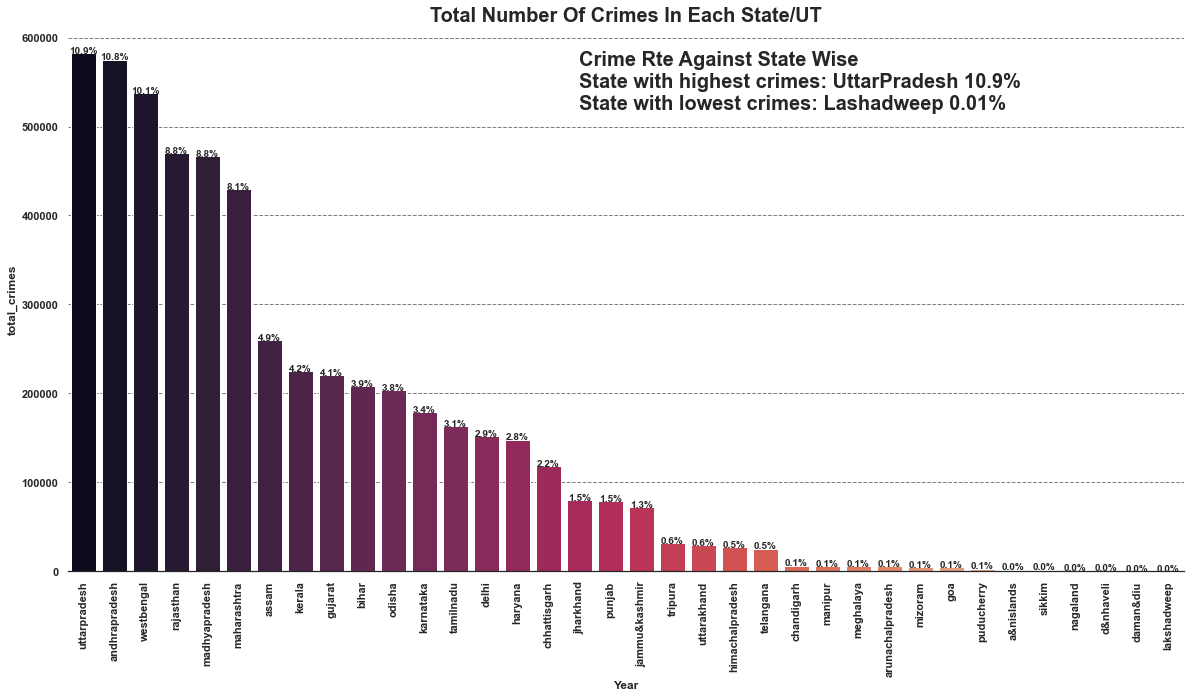

In [58]:
sns.set_theme(style='white',context='notebook')

fig=plt.figure(figsize=(20,10))

ax=plt.axes()


ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(linestyle="--",axis="y",color='gray')

a=sns.barplot(data=df_state,x=df_state.index,y='total_crimes',palette='rocket')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.text(16,520000,"Crime Rte Against State Wise\nState with highest crimes: UttarPradesh 10.9%\nState with lowest crimes: Lashadweep 0.01%",fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year",fontweight='bold')
plt.ylabel("total_crimes",fontweight='bold')
plt.title("Total Number Of Crimes In Each State/UT",fontweight='bold',fontsize=20)
without_hue_state(df_state,'total_crimes',a)
plt.show()

1. Uttar Pradesh has the highest crime rate
2. Lakshadweep has the lowest crime rate

# ANALYSIS OF EACH CRIME - STATEWISE

In [59]:
df_state.head()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
STATE/UT,,,,,,,,
uttarpradesh,51150,135906,57256,91212,53130,193738,6,582398
andhrapradesh,32150,34504,13844,126952,86964,280906,34,575354
westbengal,47876,61158,12308,66908,5348,344124,254,537976
rajasthan,45684,66278,11854,83362,794,262200,14,470186
madhyapradesh,90996,35608,21090,195478,20964,102816,134,467086


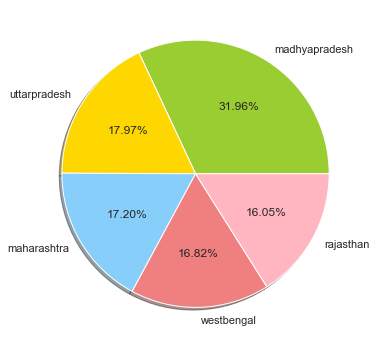

In [60]:
###STATES WITH RAPE CRIME


df_state_rape=df_state.sort_values(by="Rape",ascending=False)
df_highr=df_state_rape.iloc[:,0:1].head()
df_highr.reset_index(inplace=True)
fig=plt.figure(figsize=(20,5))

ax=plt.axes()


plt.pie(df_highr["Rape"],colors=colors,labels=df_highr['STATE/UT'],autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()
#df_state_rape[df_state_rape.index,df_state_rape['Rape']].head()

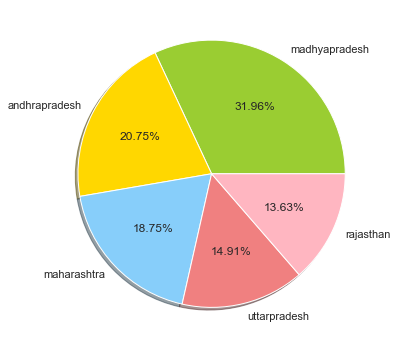

In [61]:
####ASSUALT ON WOMAN


df_state_assault=df_state.sort_values(by='Assault on women with intent to outrage her modesty',ascending=False)
df_higha=df_state_assault.iloc[:,[3]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()


plt.pie(df_higha['Assault on women with intent to outrage her modesty'],colors=colors,labels=df_higha.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()


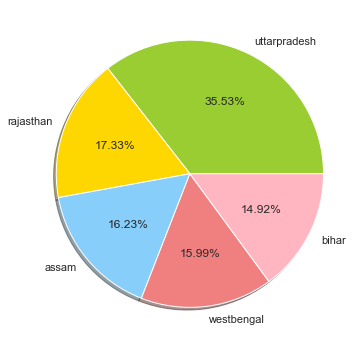

In [62]:
####Kidnapping and abduction


df_state_kidnapping=df_state.sort_values(by='Kidnapping and Abduction',ascending=False)
df_highk=df_state_kidnapping.iloc[:,[1]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()


plt.pie(df_highk["Kidnapping and Abduction"],colors=colors,labels=df_highk.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()


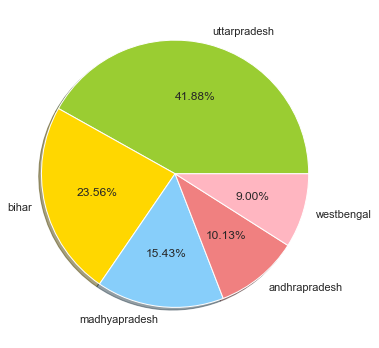

In [63]:
####Dowry deaths


df_state_kidnapping=df_state.sort_values(by='Dowry Deaths',ascending=False)
df_highk=df_state_kidnapping.iloc[:,[2]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()


plt.pie(df_highk["Dowry Deaths"],colors=colors,labels=df_highk.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()

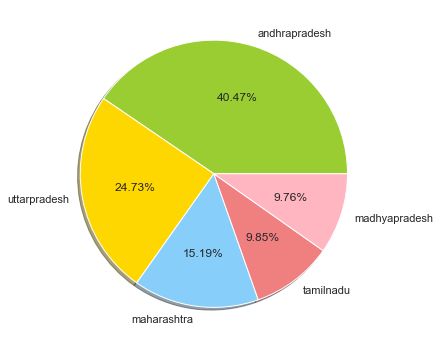

In [64]:
######INSULT TO MODESTY

df_state_kidnapping=df_state.sort_values(by='Insult to modesty of Women',ascending=False)
df_highk=df_state_kidnapping.iloc[:,[4]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()



plt.pie(df_highk['Insult to modesty of Women'],colors=colors,labels=df_highk.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()


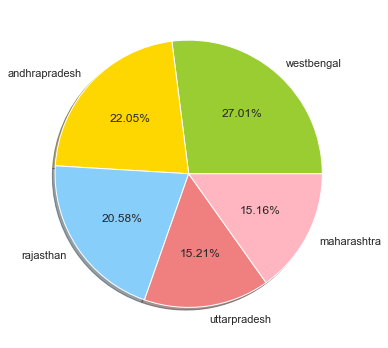

In [65]:
####CRUELTY BY HUSBAND


df_state_kidnapping=df_state.sort_values(by='Cruelty by Husband or his Relatives',ascending=False)
df_highk=df_state_kidnapping.iloc[:,[5]].head()


fig=plt.figure(figsize=(20,5))

ax=plt.axes()



plt.pie(df_highk['Cruelty by Husband or his Relatives'],colors=colors,labels=df_highk.index,autopct='%1.2f%%',shadow=True)
plt.tight_layout()
plt.show()


In [66]:

# applying groupby() function to
# group the data on team value.
df_final = df.groupby(['DISTRICT'])
df_final.first()

,STATE/UT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
DISTRICT,,,,,,,,,,
24 PARGANAS NORTH,westbengal,2001,53,63,23,63,0,447,0,649
24 PARGANAS SOUTH,westbengal,2001,47,52,48,54,0,480,0,681
A and N ISLANDS,a&nislands,2007,3,9,1,21,2,18,0,54
ADILABAD,andhrapradesh,2001,50,30,16,149,34,175,0,454
AGAR,madhyapradesh,2013,24,8,1,41,1,30,0,105
...,...,...,...,...,...,...,...,...,...,...
Yamunanagar,haryana,2014,50,82,7,76,0,170,0,385
Yavatmal,maharashtra,2014,108,135,12,466,504,301,0,1526
ZUNHEBOTO,nagaland,2001,2,0,0,0,0,0,0,2


DROPPING THE TOTAL


In [67]:
#df_new = pd.read_csv("crimes_against_women_2001-2014.csv")
for index, row in df.iterrows():
    if (row['DISTRICT']=='TOTAL' or row['DISTRICT']=='Total District(s)'):
        df.drop(index, inplace=True)

#df.drop(['Unnamed: 0'], axis=1)
df=df.drop('total_crimes', axis = 1)
#df.to_csv('New.csv',index=False)
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,andhrapradesh,ADILABAD,2001,50,30,16,149,34,175,0
1,andhrapradesh,ANANTAPUR,2001,23,30,7,118,24,154,0
2,andhrapradesh,CHITTOOR,2001,27,34,14,112,83,186,0
3,andhrapradesh,CUDDAPAH,2001,20,20,17,126,38,57,0
4,andhrapradesh,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10669,delhi,Vigilance,2014,0,0,0,0,0,0,0
10670,delhi,West,2014,251,546,13,484,63,416,0
10672,lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10674,puducherry,Karaikal,2014,3,1,0,12,1,1,0


In [68]:
# df_new.sort_values(by=['DISTRICT'])

# df_new.to_csv('test.csv')

C:\Users\vijit\AppData\Local\Temp/ipykernel_13108/1766581543.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


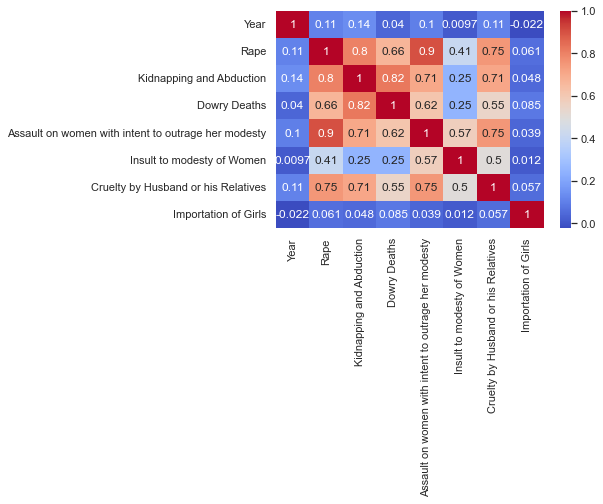

<Figure size 1440x720 with 0 Axes>

In [69]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

fig=plt.figure(figsize=(20,10))

In [70]:
df= df.applymap(lambda s:s.lower() if type(s) == str else s)

In [71]:
#df_new = pd.read_csv("crimes_against_women_2001-2014.csv")
import re

for index, row in df.iterrows():
    if (row['DISTRICT']=='total' or row['DISTRICT']=='total district(s)' or row['DISTRICT']=='zz total'):
        df.drop(index, inplace=True)
    if (row['Year']==2014):
        df.drop(index, inplace=True)
df = df.reset_index()
df.columns = df.columns.str.replace(' ','_')
df = df.replace(' ', '_', regex = True)
df
#df.to_csv('Now.csv',index=False)

,index,STATE/UT,DISTRICT,Year,Rape,Kidnapping_and_Abduction,Dowry_Deaths,Assault_on_women_with_intent_to_outrage_her_modesty,Insult_to_modesty_of_Women,Cruelty_by_Husband_or_his_Relatives,Importation_of_Girls
0,0,andhrapradesh,adilabad,2001,50,30,16,149,34,175,0
1,1,andhrapradesh,anantapur,2001,23,30,7,118,24,154,0
2,2,andhrapradesh,chittoor,2001,27,34,14,112,83,186,0
3,3,andhrapradesh,cuddapah,2001,20,20,17,126,38,57,0
4,4,andhrapradesh,east_godavari,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
9392,9832,delhi,stf,2013,0,0,0,0,0,0,0
9393,9833,delhi,west,2013,184,424,22,400,94,529,0
9394,9835,lakshadweep,lakshadweep,2013,2,0,0,1,0,0,0
9395,9837,puducherry,karaikal,2013,6,2,1,1,1,1,0


In [72]:
# one_hot_encoded_data = pd.get_dummies(df, columns = ['STATE/UT', 'DISTRICT'])
# print(one_hot_encoded_data)

## ***RAPE***

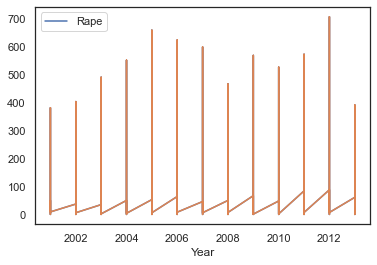

In [73]:
df_rape=df[['STATE/UT','DISTRICT','Year','Rape']].copy()

 
# Setting the Year as index
df_rape = df_rape.set_index('Year')
df_rape.plot()
plt.plot(df_rape['Rape'])
plt.show()

In [75]:

df_rape = df_rape.sort_values(by = ['DISTRICT', 'Year'], ascending = True)
df_rape = df_rape.reset_index()
df_rape.drop(['index'], axis = 1, inplace=True)
#df_rape = df_rape.groupby(['DISTRICT']).count()
#df_rape

x = df_rape.groupby(by = 'DISTRICT', group_keys=True).count()
district=[]
for index,row in x.iterrows():
    if(row['STATE/UT']<13):
        district.append(index)

for index,row in df_rape.iterrows():
    if(row['DISTRICT'] in district):
        df_rape.drop(index,inplace=True)

# y = df_rape.groupby(by = 'DISTRICT', group_keys=True).count()
df_rape.to_csv('rape.csv',index=False)

In [76]:
df_rape

,Year,STATE/UT,DISTRICT,Rape
0,2001,westbengal,24_parganas_north,53
1,2002,westbengal,24_parganas_north,88
2,2003,westbengal,24_parganas_north,92
3,2004,westbengal,24_parganas_north,176
4,2005,westbengal,24_parganas_north,217
...,...,...,...,...
9392,2009,nagaland,zunheboto,3
9393,2010,nagaland,zunheboto,3
9394,2011,nagaland,zunheboto,3
9395,2012,nagaland,zunheboto,1


In [77]:
try1 = df_rape[['STATE/UT', 'DISTRICT']].copy()
try1

,STATE/UT,DISTRICT
0,westbengal,24_parganas_north
1,westbengal,24_parganas_north
2,westbengal,24_parganas_north
3,westbengal,24_parganas_north
4,westbengal,24_parganas_north
...,...,...
9392,nagaland,zunheboto
9393,nagaland,zunheboto
9394,nagaland,zunheboto
9395,nagaland,zunheboto


In [78]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df_rape['STATE/UT']= label_encoder.fit_transform(df_rape['STATE/UT'])
df_rape['DISTRICT']= label_encoder.fit_transform(df_rape['DISTRICT'])
df_rape

,Year,STATE/UT,DISTRICT,Rape
0,2001,32,0,53
1,2002,32,0,88
2,2003,32,0,92
3,2004,32,0,176
4,2005,32,0,217
...,...,...,...,...
9392,2009,23,621,3
9393,2010,23,621,3
9394,2011,23,621,3
9395,2012,23,621,1


In [79]:
try1["State_code"] = df_rape['STATE/UT'].copy()
try1["District_code"] = df_rape['DISTRICT'].copy()
try1 = try1.drop_duplicates()
# try1 = try1.reset_index()
# df_rape.drop(['index'], axis = 1, inplace=True)
try1

try1.to_csv('encoding.csv',index=False)

In [80]:
df_rape = df_rape.reset_index()
df_rape.drop(['index'], axis = 1, inplace=True)
df_rape

,Year,STATE/UT,DISTRICT,Rape
0,2001,32,0,53
1,2002,32,0,88
2,2003,32,0,92
3,2004,32,0,176
4,2005,32,0,217
...,...,...,...,...
8284,2009,23,621,3
8285,2010,23,621,3
8286,2011,23,621,3
8287,2012,23,621,1


In [ ]:
#x_train = (year, state/ut, district) for 2001 to 2012 for all districts
#x_test = (year, state/ut, district) for 2013 for all districts
#y_train = (rape) for 2001 to 2012 for all districts
#y_test = (rape) for 2013 for all districts


In [81]:
y = pd.DataFrame(df_rape[df_rape["Year"] <=2012]) #["STATE/UT","DISTRICT","Year","Rape"]
#y

x_train = y[["Year", "STATE/UT", "DISTRICT"]]
x_train


y_train = y[["Rape"]]
#y_train

In [82]:
z = pd.DataFrame(df_rape[df_rape["Year"] == 2013])


x_test = z[["Year", "STATE/UT", "DISTRICT"]]
#x_test

y_test = z[["Rape"]]
#y_test

In [83]:
x_test

,Year,STATE/UT,DISTRICT
12,2013,32,0
25,2013,32,1
38,2013,1,2
51,2013,31,3
64,2013,10,4
...,...,...,...
8236,2013,1,617
8249,2013,23,618
8262,2013,11,619
8275,2013,19,620


**Linear Regression**

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import numpy as np
import math

lin_model = LinearRegression()

lin_model.fit(x_train,y_train)
y_pred_lin=lin_model.predict(x_test)

# y_pred

print("R square ", r2_score(y_test,y_pred_lin))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred_lin)).mean())/(y_train.max()-y_train.min()))

R square  -0.06082260908487447
NRMSE:  Rape    0.074066
dtype: float64


**Random Forest**

In [101]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor1 = RandomForestRegressor(n_estimators = 125, random_state = 0)
  
# fit the regressor with x and y data
regressor1.fit(x_train, y_train.values.ravel())  
y_pred1 = regressor1.predict(np.array(x_test))  # test the output by changing values
#len(y_pred1)

y_pred1=y_pred1.reshape(639,1)
#y_pred1

print("R Square: ", r2_score(y_test,y_pred1))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred1)).mean())/(y_train.max()-y_train.min()))

R Square:  0.6750944448634661
NRMSE:  Rape    0.04099
dtype: float64


c:\Users\vijit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


R Square:  0.6739891738838468
NRMSE:  Rape    0.041059
dtype: float64


**ARIMA**

In [ ]:
# from pmdarima.arima import auto_arima

# #arima_model = auto_arima()

# model = auto_arima(df_rape["Rape"], m=12, start_p=0, start_q=0, max_p = 2, max_q = 2, max_order=2, test='adf',error_action='ignore',  
#                            suppress_warnings=True,
#                       stepwise=True, trace=True)

In [ ]:
# model.fit(y_train)

In [ ]:
# forecast=model.predict(n_periods=1, return_conf_int=True)
# forecast

In [ ]:
# forecast_df = pd.DataFrame(forecast[0],index = y_train.index,columns=['Prediction'])
# forecast_df

In [ ]:
rape_final = pd.DataFrame(x_test, columns=["Year", "STATE/UT", "DISTRICT"])
rape_final["Prediction"] = y_pred1
rape_final.drop(['Year'], axis = 1, inplace=True)
# rape_final = rape_final.sort_values(by = 'STATE/UT')
# rape_final = rape_final.drop_duplicates().reset_index()
# rape_final.drop(['index'], axis = 1, inplace=True)

rape_final
rape_final.to_csv('rape_pred.csv',index=False)

## ***KIDNAPPING AND ABDUCTION***

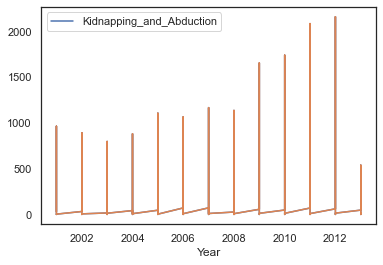

In [ ]:
df_kidabd=df[['STATE/UT','DISTRICT','Year','Kidnapping_and_Abduction']].copy()

 
# Setting the Year as index
df_kidabd = df_kidabd.set_index('Year')
df_kidabd.plot()
plt.plot(df_kidabd['Kidnapping_and_Abduction'])
plt.show()

In [ ]:
df_kidabd = df_kidabd.sort_values(by = ['DISTRICT', 'Year'], ascending = True)
df_kidabd = df_kidabd.reset_index()
df_kidabd.drop(['index'], axis = 1, inplace=True)
#df_rape = df_rape.groupby(['DISTRICT']).count()
#df_rape

x = df_kidabd.groupby(by = 'DISTRICT', group_keys=True).count()
district=[]
for index,row in x.iterrows():
    if(row['STATE/UT']<13):
        district.append(index)

for index,row in df_kidabd.iterrows():
    if(row['DISTRICT'] in district):
        df_kidabd.drop(index,inplace=True)

# y = df_rape.groupby(by = 'DISTRICT', group_keys=True).count()
df_kidabd.to_csv('kidabd.csv',index=False)

#MIGHT THROW ERROR WHILE 1st RUN...WORKS PERFECTLY AFTER EXECUTING SAME CELL AGAIN

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df_kidabd['STATE/UT']= label_encoder.fit_transform(df_kidabd['STATE/UT'])
df_kidabd['DISTRICT']= label_encoder.fit_transform(df_kidabd['DISTRICT'])

In [ ]:
df_kidabd = df_kidabd.reset_index()
df_kidabd.drop(['index'], axis = 1, inplace=True)
df_kidabd

,Year,STATE/UT,DISTRICT,Kidnapping_and_Abduction
0,2001,32,0,63
1,2002,32,0,63
2,2003,32,0,103
3,2004,32,0,124
4,2005,32,0,153
...,...,...,...,...
8284,2009,23,621,2
8285,2010,23,621,0
8286,2011,23,621,1
8287,2012,23,621,3


In [ ]:
y = pd.DataFrame(df_kidabd[df_kidabd["Year"] <=2012]) #["STATE/UT","DISTRICT","Year","Rape"]
#y

x_train = y[["Year", "STATE/UT", "DISTRICT"]]
#x_train


y_train = y[["Kidnapping_and_Abduction"]]
#y_train

In [ ]:
z = pd.DataFrame(df_kidabd[df_kidabd["Year"] == 2013])


x_test = z[["Year", "STATE/UT", "DISTRICT"]]
#x_test

y_test = z[["Kidnapping_and_Abduction"]]
#y_test

**LInear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import numpy as np
import math

lin_model = LinearRegression()

lin_model.fit(x_train,y_train)
y_pred_lin2=lin_model.predict(x_test)

# y_pred

print("R-squared: ", r2_score(y_test,y_pred_lin2))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred_lin2)).mean())/(y_train.max()-y_train.min()))

R-squared:  -0.05117777763055309
NRMSE:  Kidnapping_and_Abduction    0.166081
dtype: float64


**RANDOM FOREST**

In [ ]:


# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor2.fit(x_train, y_train.values.ravel())  

RandomForestRegressor(random_state=0)

In [ ]:
y_pred2 = regressor2.predict(np.array(x_test))  # test the output by changing values
# len(y_pred)

y_pred2=y_pred2.reshape(639,1)
y_pred2

c:\Users\vijit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[3.5513e+02],
       [3.8532e+02],
       [6.3320e+01],
       [2.7516e+02],
       [1.7522e+02],
       [6.4430e+01],
       [4.8620e+01],
       [1.7900e+01],
       [2.0800e+00],
       [9.0310e+01],
       [2.1750e+01],
       [1.5670e+01],
       [2.5885e+02],
       [1.8153e+02],
       [9.3000e-01],
       [1.4449e+02],
       [7.6280e+01],
       [1.7070e+01],
       [1.7550e+01],
       [7.1680e+01],
       [5.2290e+01],
       [6.4750e+01],
       [9.2040e+01],
       [5.7380e+01],
       [7.4090e+01],
       [3.8650e+01],
       [5.4720e+01],
       [8.3300e+01],
       [5.6210e+01],
       [1.8170e+01],
       [1.2010e+01],
       [3.2030e+01],
       [1.0046e+02],
       [1.0198e+02],
       [6.0650e+01],
       [3.3350e+01],
       [1.0400e+00],
       [8.2030e+01],
       [1.0661e+02],
       [1.1100e+01],
       [1.2044e+02],
       [7.2870e+01],
       [1.2200e+00],
       [5.8020e+01],
       [5.1810e+01],
       [3.2190e+02],
       [6.1980e+01],
       [5.766

In [ ]:
print("R Square: ", r2_score(y_test,y_pred2))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred2)).mean())/(y_train.max()-y_train.min()))

R Square:  0.6892321354771879
NRMSE:  Kidnapping_and_Abduction    0.090302
dtype: float64


In [ ]:
kidabd_final = pd.DataFrame(x_test, columns=["Year", "STATE/UT", "DISTRICT"])
kidabd_final["Prediction"] = y_pred2
kidabd_final.drop(['Year'], axis = 1, inplace=True)
# rape_final = rape_final.sort_values(by = 'STATE/UT')
# rape_final = rape_final.drop_duplicates().reset_index()
# rape_final.drop(['index'], axis = 1, inplace=True)

kidabd_final
kidabd_final.to_csv('kidabd_pred.csv',index=False)

## ***Dowry***

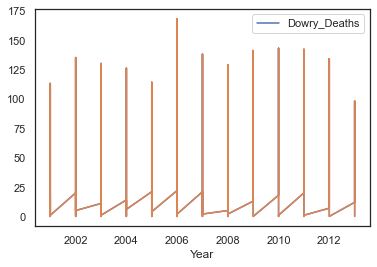

In [ ]:
df_dowry=df[['STATE/UT','DISTRICT','Year','Dowry_Deaths']].copy()

 
# Setting the Year as index
df_dowry= df_dowry.set_index('Year')
df_dowry.plot()
plt.plot(df_dowry['Dowry_Deaths'])
plt.show()

In [ ]:
df_dowry = df_dowry.sort_values(by = ['DISTRICT', 'Year'], ascending = True)
df_dowry = df_dowry.reset_index()
df_dowry.drop(['index'], axis = 1, inplace=True)
#df_rape = df_rape.groupby(['DISTRICT']).count()
#df_rape

x = df_dowry.groupby(by = 'DISTRICT', group_keys=True).count()
district=[]
for index,row in x.iterrows():
    if(row['STATE/UT']<13):
        district.append(index)

for index,row in df_dowry.iterrows():
    if(row['DISTRICT'] in district):
        df_dowry.drop(index,inplace=True)

# y = df_rape.groupby(by = 'DISTRICT', group_keys=True).count()
df_dowry.to_csv('dowry.csv',index=False)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df_dowry['STATE/UT']= label_encoder.fit_transform(df_dowry['STATE/UT'])
df_dowry['DISTRICT']= label_encoder.fit_transform(df_dowry['DISTRICT'])
df_dowry = df_dowry.reset_index()
df_dowry.drop(['index'], axis = 1, inplace=True)

In [ ]:
y = pd.DataFrame(df_dowry[df_dowry["Year"] <=2012]) #["STATE/UT","DISTRICT","Year","Rape"]
#y

x_train = y[["Year", "STATE/UT", "DISTRICT"]]
#x_train


y_train = y[["Dowry_Deaths"]]
#y_train

In [ ]:

z = pd.DataFrame(df_dowry[df_dowry["Year"] == 2013])


x_test = z[["Year", "STATE/UT", "DISTRICT"]]
#x_test

y_test = z[["Dowry_Deaths"]]
#y_test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import numpy as np
import math

lin_model = LinearRegression()

lin_model.fit(x_train,y_train)
y_pred_lin3=lin_model.predict(x_test)

# y_pred

print("R-squared: ", r2_score(y_test,y_pred_lin3))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred_lin3)).mean())/(y_train.max()-y_train.min()))

R-squared:  0.029672819144724527
NRMSE:  Dowry_Deaths    0.088761
dtype: float64


In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor3 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor3.fit(x_train, y_train.values.ravel())  

RandomForestRegressor(random_state=0)

In [ ]:
y_pred3 = regressor3.predict(np.array(x_test))  # test the output by changing values
# len(y_pred)

y_pred3=y_pred3.reshape(639,1)
y_pred3

c:\Users\vijit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[7.2430e+01],
       [4.8180e+01],
       [1.1430e+01],
       [8.4620e+01],
       [1.2440e+01],
       [2.1000e-01],
       [2.2380e+01],
       [1.5000e-01],
       [9.0000e-01],
       [1.4500e+01],
       [7.1500e+00],
       [1.6000e+00],
       [7.0270e+01],
       [6.8790e+01],
       [3.2900e+00],
       [4.7380e+01],
       [1.1590e+01],
       [1.6900e+00],
       [2.7400e+00],
       [2.0000e-02],
       [0.0000e+00],
       [1.9900e+01],
       [0.0000e+00],
       [2.2160e+01],
       [2.1170e+01],
       [1.5470e+01],
       [1.5850e+01],
       [1.9240e+01],
       [2.7070e+01],
       [4.4900e+00],
       [2.3410e+01],
       [0.0000e+00],
       [2.6470e+01],
       [4.4630e+01],
       [1.0680e+01],
       [4.2600e+00],
       [3.3000e+00],
       [2.3330e+01],
       [4.2460e+01],
       [5.2000e+00],
       [4.2740e+01],
       [2.5870e+01],
       [9.7000e-01],
       [1.1880e+01],
       [3.2800e+01],
       [5.0770e+01],
       [1.0360e+01],
       [2.051

In [ ]:
print("R Square: ", r2_score(y_test,y_pred3))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred3)).mean())/(y_train.max()-y_train.min()))

R Square:  0.8619656674078754
NRMSE:  Dowry_Deaths    0.033478
dtype: float64


In [ ]:
dowry_final = pd.DataFrame(x_test, columns=["Year", "STATE/UT", "DISTRICT"])
dowry_final["Prediction"] = y_pred3
dowry_final.drop(['Year'], axis = 1, inplace=True)
# rape_final = rape_final.sort_values(by = 'STATE/UT')
# rape_final = rape_final.drop_duplicates().reset_index()
# rape_final.drop(['index'], axis = 1, inplace=True)

dowry_final
dowry_final.to_csv('dowry_pred.csv',index=False)

## ***Assault on Women***

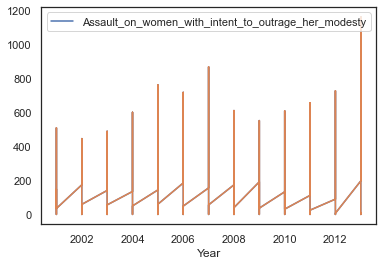

In [ ]:
df_assault=df[['STATE/UT','DISTRICT','Year','Assault_on_women_with_intent_to_outrage_her_modesty']].copy()

 
# Setting the Year as index
df_assault= df_assault.set_index('Year')
df_assault.plot()
plt.plot(df_assault['Assault_on_women_with_intent_to_outrage_her_modesty'])
plt.show()


In [ ]:
df_assault = df_assault.sort_values(by = ['DISTRICT', 'Year'], ascending = True)
df_assault = df_assault.reset_index()
df_assault.drop(['index'], axis = 1, inplace=True)
# df_rape = df_rape.groupby(['DISTRICT']).count()
# df_rape

x = df_assault.groupby(by = 'DISTRICT', group_keys=True).count()
district=[]
for index,row in x.iterrows():
    if(row['STATE/UT']<13):
        district.append(index)

for index,row in df_assault.iterrows():
    if(row['DISTRICT'] in district):
        df_assault.drop(index,inplace=True)

# y = df_rape.groupby(by = 'DISTRICT', group_keys=True).count()
df_assault.to_csv('assault.csv',index=False)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df_assault['STATE/UT']= label_encoder.fit_transform(df_assault['STATE/UT'])
df_assault['DISTRICT']= label_encoder.fit_transform(df_assault['DISTRICT'])
df_assault = df_assault.reset_index()
df_assault.drop(['index'], axis = 1, inplace=True)

In [ ]:
y = pd.DataFrame(df_assault[df_assault["Year"]<=2012]) 
# ["STATE/UT","DISTRICT","Year","Rape"]
# y

x_train = y[["Year", "STATE/UT", "DISTRICT"]]
# x_train


y_train = y[["Assault_on_women_with_intent_to_outrage_her_modesty"]]
# y_train

In [ ]:
z = pd.DataFrame(df_assault[df_assault["Year"] == 2013])


x_test = z[["Year", "STATE/UT", "DISTRICT"]]
# x_test

y_test = z[["Assault_on_women_with_intent_to_outrage_her_modesty"]]
# y_test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import numpy as np
import math

lin_model = LinearRegression()

lin_model.fit(x_train,y_train)
y_pred_lin4=lin_model.predict(x_test)

# y_pred

print("R-squared: ", r2_score(y_test,y_pred_lin4))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred_lin4)).mean())/(y_train.max()-y_train.min()))

R-squared:  -0.10250054885274995
NRMSE:  Assault_on_women_with_intent_to_outrage_her_modesty    0.169472
dtype: float64


In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor4 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor4.fit(x_train, y_train.values.ravel()) 

RandomForestRegressor(random_state=0)

In [ ]:
y_pred4 = regressor4.predict(np.array(x_test))  # test the output by changing values
# len(y_pred)

y_pred4=y_pred4.reshape(639,1)
y_pred4

c:\Users\vijit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[1.9249e+02],
       [9.5940e+01],
       [1.1768e+02],
       [1.3203e+02],
       [7.9220e+01],
       [2.7900e+01],
       [1.4677e+02],
       [9.7000e-01],
       [4.6360e+01],
       [8.6990e+01],
       [9.5450e+01],
       [2.3842e+02],
       [1.2117e+02],
       [8.2380e+01],
       [4.7000e+00],
       [1.3076e+02],
       [1.6040e+01],
       [5.6090e+01],
       [1.6000e+02],
       [2.1730e+01],
       [2.2340e+01],
       [1.7618e+02],
       [1.2811e+02],
       [3.0561e+02],
       [6.9700e+00],
       [2.5800e+00],
       [3.0560e+01],
       [2.3770e+01],
       [1.9400e+00],
       [7.8440e+01],
       [7.9810e+01],
       [1.5610e+01],
       [2.8770e+01],
       [4.4620e+01],
       [1.0300e+00],
       [6.5980e+01],
       [4.5200e+00],
       [2.8410e+01],
       [3.2570e+01],
       [1.1106e+02],
       [2.3345e+02],
       [2.2220e+01],
       [5.3710e+01],
       [1.7720e+01],
       [5.4610e+01],
       [2.9173e+02],
       [9.4230e+01],
       [4.000

In [ ]:
print("R Square: ", r2_score(y_test,y_pred4))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred4)).mean())/(y_train.max()-y_train.min()))

R Square:  0.5908766210659206
NRMSE:  Assault_on_women_with_intent_to_outrage_her_modesty    0.103237
dtype: float64


In [ ]:
assault_final = pd.DataFrame(x_test, columns=["Year", "STATE/UT", "DISTRICT"])
assault_final["Prediction"] = y_pred4
assault_final.drop(['Year'], axis = 1, inplace=True)
# rape_final = rape_final.sort_values(by = 'STATE/UT')
# rape_final = rape_final.drop_duplicates().reset_index()
# rape_final.drop(['index'], axis = 1, inplace=True)

assault_final
assault_final.to_csv('assault_pred.csv',index=False)

## ***Insult to modesty of Women***

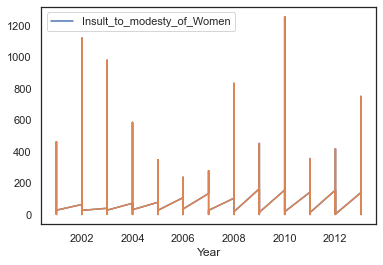

In [ ]:
df_insult=df[['STATE/UT','DISTRICT','Year','Insult_to_modesty_of_Women']].copy()

 
# Setting the Year as index
df_insult= df_insult.set_index('Year')
df_insult.plot()
# plt.plot(df_insult['Insult_to_modesty_of_Women'])
plt.plot(df_insult['Insult_to_modesty_of_Women'])
plt.show()

In [ ]:
df_insult = df_insult.sort_values(by = ['DISTRICT', 'Year'], ascending = True)
df_insult = df_insult.reset_index()
df_insult.drop(['index'], axis = 1, inplace=True)
# df_rape = df_rape.groupby(['DISTRICT']).count()
# df_rape

x = df_insult.groupby(by = 'DISTRICT', group_keys=True).count()
district=[]
for index,row in x.iterrows():
    if(row['STATE/UT']<13):
        district.append(index)

for index,row in df_insult.iterrows():
    if(row['DISTRICT'] in district):
        df_insult.drop(index,inplace=True)

# y = df_rape.groupby(by = 'DISTRICT', group_keys=True).count()
df_insult.to_csv('insult.csv',index=False)

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
df_insult['STATE/UT']= label_encoder.fit_transform(df_insult['STATE/UT'])
df_insult['DISTRICT']= label_encoder.fit_transform(df_insult['DISTRICT'])
df_insult = df_insult.reset_index()
df_insult.drop(['index'], axis = 1, inplace=True)

In [ ]:
y = pd.DataFrame(df_insult[df_insult["Year"]<=2012]) 
# ["STATE/UT","DISTRICT","Year","Rape"]
# y

x_train = y[["Year", "STATE/UT", "DISTRICT"]]
# x_train


y_train = y[["Insult_to_modesty_of_Women"]]
# y_train

In [ ]:
z = pd.DataFrame(df_insult[df_insult["Year"] == 2013])


x_test = z[["Year", "STATE/UT", "DISTRICT"]]
# x_test

y_test = z[["Insult_to_modesty_of_Women"]]
# y_test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import numpy as np
import math

lin_model = LinearRegression()

lin_model.fit(x_train,y_train)
y_pred_lin5=lin_model.predict(x_test)

# y_pred

print("R-squared: ", r2_score(y_test,y_pred_lin5))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred_lin5)).mean())/(y_train.max()-y_train.min()))

R-squared:  0.0015551770506925244
NRMSE:  Insult_to_modesty_of_Women    0.044502
dtype: float64


In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor5 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor5.fit(x_train, y_train.values.ravel()) 

RandomForestRegressor(random_state=0)

In [ ]:
y_pred5 = regressor5.predict(np.array(x_test))  # test the output by changing values
# len(y_pred)

y_pred5=y_pred5.reshape(639,1)
y_pred5

c:\Users\vijit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[3.0600e+00],
       [9.2000e-01],
       [1.4670e+02],
       [0.0000e+00],
       [1.0350e+01],
       [2.2000e-01],
       [3.2100e+00],
       [5.2000e-01],
       [0.0000e+00],
       [1.7000e-01],
       [3.6520e+01],
       [2.5410e+01],
       [3.0000e-02],
       [2.5000e-01],
       [3.2600e+00],
       [1.5000e-01],
       [1.0000e-02],
       [1.5730e+01],
       [3.9760e+01],
       [5.2700e+00],
       [1.6300e+00],
       [2.9320e+01],
       [3.5890e+01],
       [7.7000e+00],
       [5.6000e+00],
       [1.5400e+00],
       [3.6100e+00],
       [0.0000e+00],
       [4.9000e-01],
       [2.9010e+01],
       [2.0060e+01],
       [6.0900e+00],
       [0.0000e+00],
       [0.0000e+00],
       [1.4000e-01],
       [1.7700e+00],
       [9.6000e-01],
       [0.0000e+00],
       [3.0000e-02],
       [1.0500e+01],
       [2.0320e+01],
       [0.0000e+00],
       [4.7500e+00],
       [0.0000e+00],
       [0.0000e+00],
       [4.4860e+01],
       [1.1400e+00],
       [0.000

In [ ]:
print("R Square: ", r2_score(y_test,y_pred5))

print("NRMSE: ", math.sqrt(np.square(np.subtract(y_test,y_pred5)).mean())/(y_train.max()-y_train.min()))

R Square:  0.5411122394379667
NRMSE:  Insult_to_modesty_of_Women    0.030169
dtype: float64


In [ ]:
insult_final = pd.DataFrame(x_test, columns=["Year", "STATE/UT", "DISTRICT"])
insult_final["Prediction"] = y_pred5
insult_final.drop(['Year'], axis = 1, inplace=True)
# rape_final = rape_final.sort_values(by = 'STATE/UT')
# rape_final = rape_final.drop_duplicates().reset_index()
# rape_final.drop(['index'], axis = 1, inplace=True)

insult_final
insult_final.to_csv('insult_pred.csv',index=False)

In [ ]:
###THE END